In [133]:

import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm.auto import tqdm
from tqdm import tqdm


tqdm.pandas()

/home/kenterbery/anaconda3/envs/speech_emotion_recognition/lib/python3.7/site-packages/tqdm/std.py:701: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
Ravdess = "/home/kenterbery/projects/speech_emotion_recognition/input/Ravdess/audio_speech_actors_01-24/"
Crema = "/home/kenterbery/projects/speech_emotion_recognition/input/Crema/"
Savee = "/home/kenterbery/projects/speech_emotion_recognition/input/Savee/"
Tess = "/home/kenterbery/projects/speech_emotion_recognition/input/Tess/"

Ravdess dataset

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

emotion_df = []

for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for wav in actor:
        info = wav.partition(".wav")[0].split("-")
        emotion = int(info[2])
        emotion_df.append((emotion, Ravdess + dir + "/" + wav))

In [4]:
Ravdess_df = pd.DataFrame.from_dict(emotion_df)
Ravdess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

In [5]:
Ravdess_df.Emotion.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


Crema dataset


In [6]:
emotion_df = []

for wav in os.listdir(Crema):
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion_df.append(("sad", Crema + wav))
    elif info[2] == 'ANG':
        emotion_df.append(("angry", Crema + wav))
    elif info[2] == 'DIS':
        emotion_df.append(("disgust", Crema + wav))
    elif info[2] == 'FEA':
        emotion_df.append(("fear", Crema + wav))
    elif info[2] == 'HAP':
        emotion_df.append(("happy", Crema + wav))
    elif info[2] == 'NEU':
        emotion_df.append(("neutral", Crema + wav))
    else:
        emotion_df.append(("unknown", Crema + wav))


Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

,Emotion,Path
0,disgust,/home/kenterbery/projects/speech_emotion_recog...
1,happy,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,happy,/home/kenterbery/projects/speech_emotion_recog...
4,neutral,/home/kenterbery/projects/speech_emotion_recog...


TESS dataset

In [7]:
tess_directory_list = os.listdir(Tess)

emotion_df = []

for dir in tess_directory_list:
    for wav in os.listdir(Tess + dir):
        info = wav.partition(".wav")[0].split("_")
        emo = info[2]
        if emo == "ps":
            emotion_df.append(("surprise", Tess + dir + "/" + wav))
        else:
            emotion_df.append((emo, Tess + dir + "/" + wav))


Tess_df = pd.DataFrame.from_dict(emotion_df)
Tess_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Tess_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,sad,/home/kenterbery/projects/speech_emotion_recog...
2,sad,/home/kenterbery/projects/speech_emotion_recog...
3,sad,/home/kenterbery/projects/speech_emotion_recog...
4,sad,/home/kenterbery/projects/speech_emotion_recog...


In [8]:
savee_directiory_list = os.listdir(Savee)

emotion_df = []

for wav in savee_directiory_list:
    info = wav.partition(".wav")[0].split("_")[1].replace(r"[0-9]", "")
    emotion = re.split(r"[0-9]", info)[0]
    if emotion=='a':
        emotion_df.append(("angry", Savee + wav))
    elif emotion=='d':
        emotion_df.append(("disgust", Savee + wav))
    elif emotion=='f':
        emotion_df.append(("fear", Savee + wav))
    elif emotion=='h':
        emotion_df.append(("happy", Savee + wav))
    elif emotion=='n':
        emotion_df.append(("neutral", Savee + wav))
    elif emotion=='sa':
        emotion_df.append(("sad", Savee + wav))
    else:
        emotion_df.append(("surprise", Savee + wav))


Savee_df = pd.DataFrame.from_dict(emotion_df)
Savee_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Savee_df.head()

,Emotion,Path
0,sad,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,angry,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [9]:
df = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)
df.shape

(12162, 2)

In [10]:
df.head()

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...


In [11]:
%matplotlib inline

plt.style.use("ggplot")

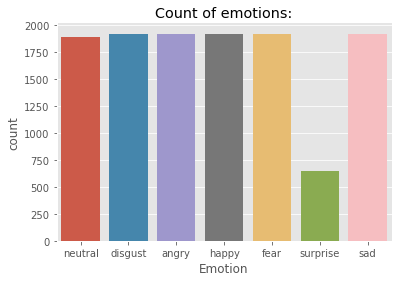

In [12]:
plt.title("Count of emotions:")
sns.countplot(x=df["Emotion"])
sns.despine(top=True, right=True, left=False, bottom=False)

In [13]:
df.head(10)

,Emotion,Path
0,neutral,/home/kenterbery/projects/speech_emotion_recog...
1,neutral,/home/kenterbery/projects/speech_emotion_recog...
2,disgust,/home/kenterbery/projects/speech_emotion_recog...
3,disgust,/home/kenterbery/projects/speech_emotion_recog...
4,disgust,/home/kenterbery/projects/speech_emotion_recog...
5,angry,/home/kenterbery/projects/speech_emotion_recog...
6,angry,/home/kenterbery/projects/speech_emotion_recog...
7,happy,/home/kenterbery/projects/speech_emotion_recog...
8,fear,/home/kenterbery/projects/speech_emotion_recog...
9,angry,/home/kenterbery/projects/speech_emotion_recog...


In [14]:
def create_spectrogram_plot(data, output_path):
    # X = librosa.stft(data)
    # Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    # For plotting headlessly
    from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
    # fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    # ax = fig.add_subplot(111)
    # librosa.display.specshow(Xdb, cmap="gray_r")
    # fig.savefig(output_path)

    fig = plt.Figure()
    # canvas = FigureCanvas(fig)
    ax = fig.add_subplot(111)
    p = librosa.display.specshow(Xdb, ax=ax, cmap="magma",)
    fig.savefig(output_path,  bbox_inches='tight', pad_inches=0)
#
#
def create_spectrogram(data, sr):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X), ref=np.max)

    return Xdb

def get_mel_spectrogram(path):
    data, sr = librosa.load(path, duration=2.5, offset=0.6)
    melspec = librosa.feature.melspectrogram(data, sr=sr, n_mels=128)
    melspec = librosa.power_to_db(melspec).astype(np.float32)

    return melspec

In [25]:
def fill_to_max_shape(mel):
    t = np.pad(mel, ((0,0),(0, max_shape - mel.shape[1])), mode='constant', constant_values=-99)
    return t

In [18]:
mel_df = []

print("Start processing...")

a = df.Path.progress_apply(get_mel_spectrogram)
print("Done.")
a.shape

100%|██████████| 12162/12162 [15:51<00:00, 12.78it/s]


Start processing...
Done.


(12162,)

In [27]:
max_shape = a.progress_apply(lambda x: x.shape[1]).max()

100%|██████████| 12162/12162 [00:00<00:00, 414253.09it/s]


In [28]:
a = a.progress_apply(fill_to_max_shape)
a.iloc[0].shape

100%|██████████| 12162/12162 [00:01<00:00, 8517.07it/s]


(128, 108)

In [151]:
df["MelSpec"] = a
df.head()

array([[-66.87003 , -56.756348, -55.05352 , ..., -57.27312 , -49.51666 ,
        -45.69447 ],
       [-72.44478 , -59.4984  , -58.47601 , ..., -66.96373 , -66.16691 ,
        -60.22343 ],
       [-74.28613 , -60.766544, -57.56222 , ..., -65.23785 , -67.93416 ,
        -65.501396],
       ...,
       [-80.67789 , -80.67789 , -80.67789 , ..., -80.67789 , -80.67789 ,
        -80.67789 ],
       [-80.67789 , -80.67789 , -80.67789 , ..., -80.67789 , -80.67789 ,
        -80.67789 ],
       [-80.67789 , -80.67789 , -80.67789 , ..., -80.67789 , -80.67789 ,
        -80.67789 ]], dtype=float32)

In [33]:
df["MelSpec"].iloc[0].shape

(128, 108)

### Try to modeling using MelSpec

In [146]:
X = df.MelSpec.values.reshape(df.shape[0], 128, 108, 1)
Y = df.Emotion.values

ValueError: cannot reshape array of size 12162 into shape (12162,128,108,1)

In [ ]:
X.shape
Y.shape

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df.MelSpec.values.reshape, df.Emotion.values, shuffle=True, test_size=.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9729,)
(2433,)
(9729,)
(2433,)


In [141]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(7783,)
(1946,)
(2433,)
(7783,)
(1946,)
(2433,)


In [142]:
print("try to standartize")
scaler = MinMaxScaler()
for i in range(X_train.shape[0]):
    X_train[i] = scaler.fit_transform(X_train[i])
    X_train[i] = X_train[i].reshape((128, 108, 1))
for i in range(X_val.shape[0]):
    X_val[i] = scaler.transform(X_val[i])
    X_train[i] = X_train[i].reshape((128, 108, 1))
for i in range(X_test.shape[0]):
    X_test[i] = scaler.transform(X_test[i])
    X_train[i] = X_train[i].reshape((128, 108, 1))
print("Done")
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

try to standartize
Done


In [143]:
X_train.shape

ValueError: setting an array element with a sequence.

In [124]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

In [125]:
y_train[0]

2

In [ ]:
batch_size = 32
EPOCHS = 50

In [130]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5,5), padding="same", input_shape=(128, 108, 1), activation="relu"))
model.add(layers.Conv2D(32, kernel_size=(5,5), padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(7, activation="softmax"))

In [131]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="acc")

In [132]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 108, 32)      832       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 108, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 54, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 54, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 54, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 27, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 27, 64)       

In [134]:
early_stopping = EarlyStopping(monitor="val_acc", patience=8, min_delta=0.0001, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_acc", patience=5, factor=0.3)


In [138]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                 batch_size=batch_size, epochs=EPOCHS, callbacks=[early_stopping, reduce_lr])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).